In [1]:
#Importing relevant packages
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
#Set Seaborn style for cleaner visuals
sns.set(style="whitegrid")

#Define labels for Fashion MNIST (optional, improves readability)
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

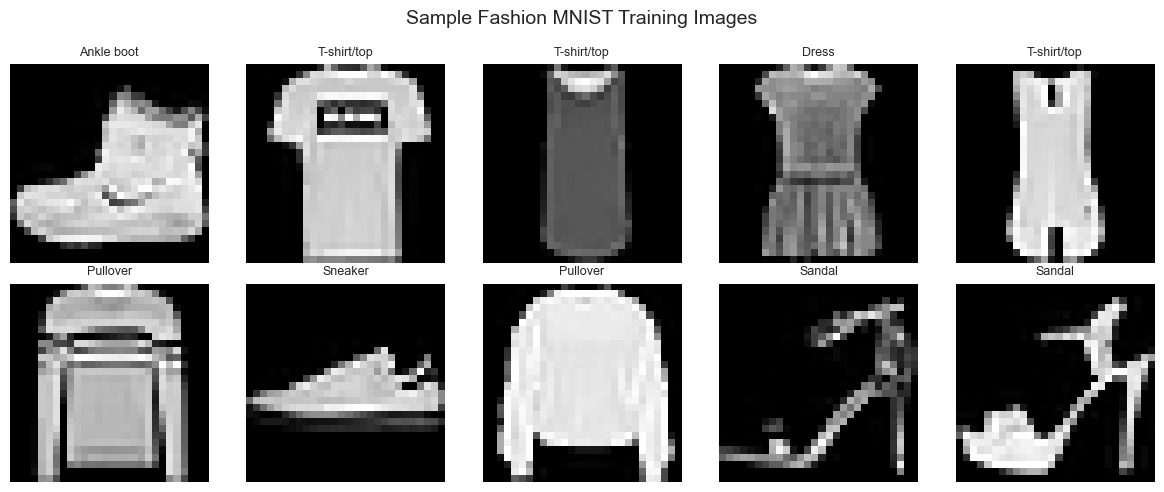

In [4]:
#Plot the first 10 images
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{class_labels[y_train[i]]}", fontsize=9)
    plt.axis('off')

plt.suptitle("Sample Fashion MNIST Training Images", fontsize=14)
plt.tight_layout()
plt.show()

In [5]:
#Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28, 1)


In [6]:
#Create model architecture
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [7]:
#Compiling and training code
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=32
)

Epoch 1/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.4278 - accuracy: 0.8493 - val_loss: 0.3326 - val_accuracy: 0.8785
Epoch 2/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2920 - accuracy: 0.8949 - val_loss: 0.2728 - val_accuracy: 0.9033
Epoch 3/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2493 - accuracy: 0.9098 - val_loss: 0.2566 - val_accuracy: 0.9117
Epoch 4/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2188 - accuracy: 0.9197 - val_loss: 0.2479 - val_accuracy: 0.9110
Epoch 5/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1942 - accuracy: 0.9287 - val_loss: 0.2613 - val_accuracy: 0.9070


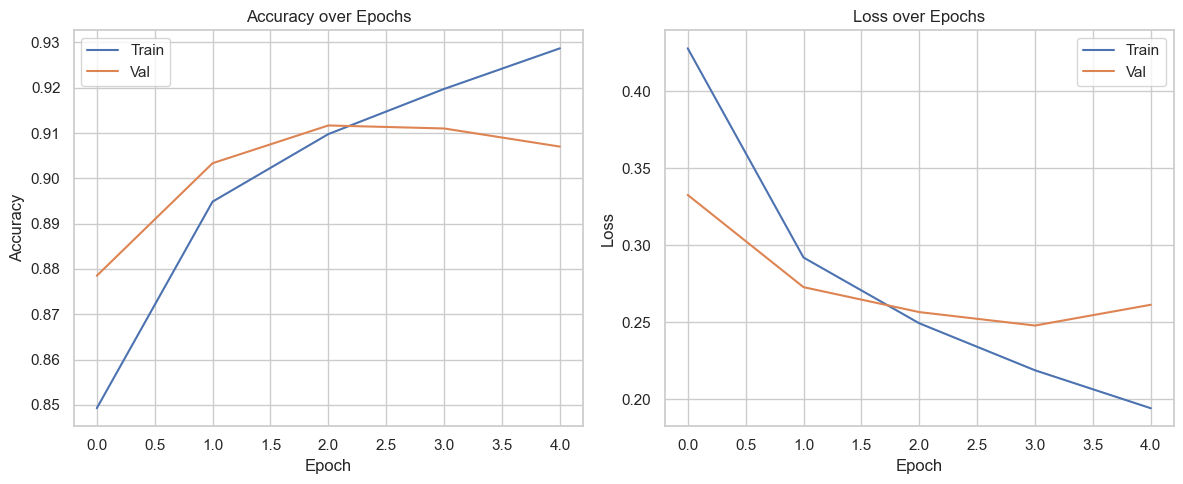

In [8]:
#Plotting accuracy/loss curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
#Final evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.9040
Test accuracy: 0.9040


In [10]:
#Saving the model
model.save("fashion_mnist_model.h5")
print("Model saved to 'fashion_mnist_model.h5'")

c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to 'fashion_mnist_model.h5'
